# 预测建模

预测建模是一种用来预测系统未来行为的分析技术，它由一群能够识别独立输入变量与反馈目标关联关系的算法构成。我们根据观测值创建一个数学模型，然后用这个模型去预测未来发生的事情。

由于大数据在各个垂直领域的蓬勃发展，预测建模备受关注。在数据挖掘领域，预测建模常用来预测未来趋势。

在预测建模中，需要收集已知的响应数据来训练模型。一旦模型建成，就可以用一些指标来检验它，然后用它预测未来值。可以通过许多种不同的算法来创建预测模型。

### 1 将数据可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *

# Load multivar data in the input file
def load_data(input_file):
    X = []
    y = []
    with open(input_file, 'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data[:-1])
            y.append(data[-1]) 

    X = np.array(X)
    y = np.array(y)

    return X, y

# Plot the classifier boundaries on input data
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here: 
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15), 
                textcoords = 'offset points', 
                horizontalalignment = 'right', 
                verticalalignment = 'bottom', 
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

# Print performance metrics
def print_accuracy_report(classifier, X, y, num_validations=5):
    accuracy = cross_val_score(classifier, 
            X, y, scoring='accuracy', cv=num_validations)
    print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

    f1 = cross_val_score(classifier, 
            X, y, scoring='f1_weighted', cv=num_validations)
    print("F1: " + str(round(100*f1.mean(), 2)) + "%")

    precision = cross_val_score(classifier, 
            X, y, scoring='precision_weighted', cv=num_validations)
    print("Precision: " + str(round(100*precision.mean(), 2)) + "%")

    recall = cross_val_score(classifier, 
            X, y, scoring='recall_weighted', cv=num_validations)
    print("Recall: " + str(round(100*recall.mean(), 2)) + "%")

In [2]:
input_file = '../data/classic/data_multivar3.txt'
X, y = load_data(input_file)

In [3]:
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

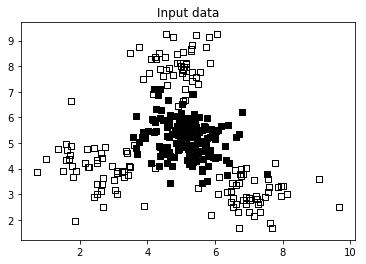

In [4]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black',
marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black',
marker='s')
plt.title('Input data')
plt.show()

### 2 分割数据集与训练分类器

In [5]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=5)

params = {'kernel': 'linear'}
classifier = SVC(**params)

In [6]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

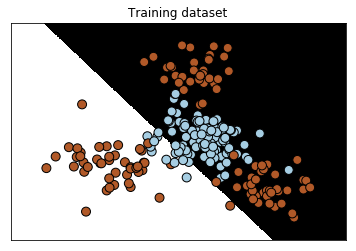

In [7]:
plot_classifier(classifier, X_train, y_train, 'Training dataset')
plt.show()

### 3 测试模型

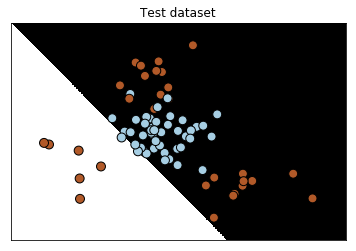

In [8]:
y_test_pred = classifier.predict(X_test)
plot_classifier(classifier, X_test, y_test, 'Test dataset')
plt.show()

In [9]:
from sklearn.metrics import classification_report

target_names = ['Class-' + str(int(i)) for i in set(y)]
print("\n" + "#"*30)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
target_names=target_names))
print("#"*30 + "\n")


##############################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.55      0.88      0.68       105
    Class-1       0.78      0.38      0.51       120

avg / total       0.67      0.61      0.59       225

##############################



In [10]:
print("#"*30)
print("\nClassification report on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("#"*30 + "\n")

##############################

Classification report on test dataset

             precision    recall  f1-score   support

    Class-0       0.64      0.96      0.77        45
    Class-1       0.75      0.20      0.32        30

avg / total       0.69      0.65      0.59        75

##############################



### 4 改进：用SVM建立非线性分类器

SVM为建立非线性分类器提供了许多选项，需要用不同的核函数建立非线性分类器。为了简单起见，考虑两种情况，当想要表示两种类型数据的曲线边界时，既可以用多项式函数，也可以用径向基函数（Radial Basis Function，RBF）。

* 对于第一种情况，可以用一个多项式核函数建立非线性分类器。

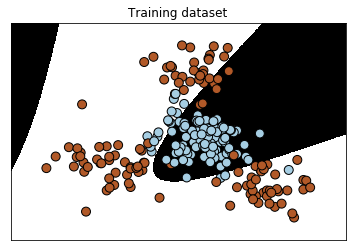

In [11]:
params = {'kernel': 'poly', 'degree': 3}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
plot_classifier(classifier, X_train, y_train, 'Training dataset')
plt.show()

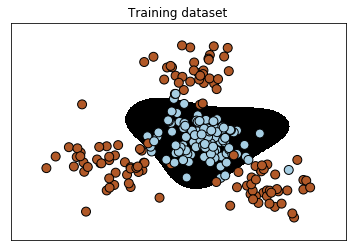

In [12]:
params = {'kernel': 'rbf'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
plot_classifier(classifier, X_train, y_train, 'Training dataset')
plt.show()

In [13]:
target_names = ['Class-' + str(int(i)) for i in set(y)]
print("\n" + "#"*30)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
target_names=target_names))
print("#"*30 + "\n")


##############################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.95      0.98      0.97       105
    Class-1       0.98      0.96      0.97       120

avg / total       0.97      0.97      0.97       225

##############################



### 5 解决类型数量不平衡问题

到目前为止，我们处理的问题都是所有类型的数据点数量比较接近的情况，但是在真实世界中，我们不可能总能获取到这么均衡的数据集。有时，某一个类型的数据点数量可能比其他类型多很多，在这种条件下训练的分类器就会有偏差。边界线不会反映数据的真实特性，因为两种类型的数据点数量差别太大。因此，需要慎重考虑这种差异性，并想办法调和，才能保证分类器是不偏不倚的。

In [14]:
X, y = load_data('../data/classic/data_multivar_imbalance.txt')

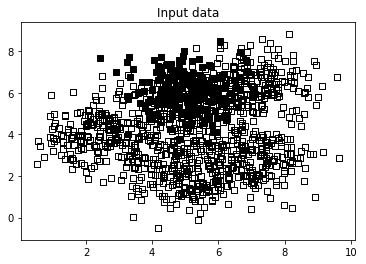

In [15]:
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black',
marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black',
marker='s')
plt.title('Input data')
plt.show()

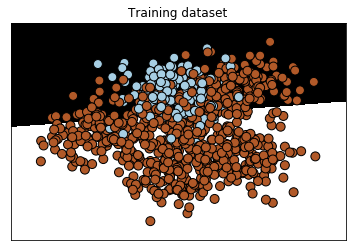

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=5)

params = {'kernel': 'linear', 'class_weight': 'balanced'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
plot_classifier(classifier, X_train, y_train, 'Training dataset')
plt.show()

In [17]:
target_names = ['Class-' + str(int(i)) for i in set(y)]
print("\n" + "#"*30)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
target_names=target_names))
print("#"*30 + "\n")


##############################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.39      0.91      0.54       158
    Class-1       0.97      0.69      0.81       742

avg / total       0.87      0.73      0.76       900

##############################



### 6 提取置信度

如果能够获取对未知数据进行分类的置信水平，那将会非常有用。当一个新的数据点被分类为某一个已知类别时，我们可以训练SVM来计算出输出类型的置信度。

In [18]:
# 测量数据点与边界的距离
input_datapoints = np.array([[2, 1.5], [8, 9], [4.8, 5.2], [4, 4], [2.5, 7], [7.6, 2], [5.4, 5.9]])
print("\nDistance from the boundary:")
for i in input_datapoints:
    print(i, '-->', classifier.decision_function([i])[0])

# Confidence measure
params = {'kernel': 'rbf', 'probability': True}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
print("\nConfidence measure:")
for i in input_datapoints:
    print(i, '-->', classifier.predict_proba([i])[0])


Distance from the boundary:
[ 2.   1.5] --> 3.060833545
[ 8.  9.] --> -3.40363451837
[ 4.8  5.2] --> -0.146669197366
[ 4.  4.] --> 0.906010857202
[ 2.5  7. ] --> -2.12742725145
[ 7.6  2. ] --> 3.22673685185
[ 5.4  5.9] --> -0.745428258837

Confidence measure:
[ 2.   1.5] --> [ 0.08919589  0.91080411]
[ 8.  9.] --> [ 0.07770547  0.92229453]
[ 4.8  5.2] --> [ 0.19342219  0.80657781]
[ 4.  4.] --> [ 0.05118214  0.94881786]
[ 2.5  7. ] --> [ 0.3598159  0.6401841]
[ 7.6  2. ] --> [ 0.07522523  0.92477477]
[ 5.4  5.9] --> [ 0.66801703  0.33198297]


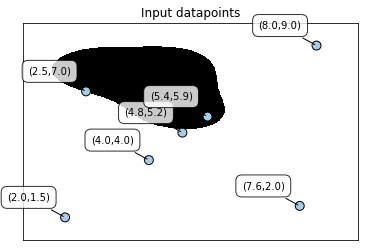

In [19]:
plot_classifier(classifier, input_datapoints, [0]*len(input_datapoints), 'Input datapoints', 'True')